## Flexure of the lithosphere

Under an applied load ($V_a$), the elastic lithosphere deflects by amount $w$ from its undeformed surface following the equation:

\begin{equation}
    D\frac{d^4 w }{d x^4} + P\frac{d^2 w }{d x^2}= V_a,  \tag{1}
\end{equation}

Here, $P$ represents the horizontal force per unit length applied to the plate in the $z$ direction. $D$ is the flexural rigidity of the plate that determines how easily it can be deformed, $D \equiv \frac{Eh^3}{12 (1-\nu^2)}$, such that $E$ is the Youngs' modulus, $h$ is the plate thickness, and $\nu$ is its possion's ratio. The coordinate $x$ represents the horizontal distance and the deflection $w$ is measured positive downwards.

The above equation assumes that the plate is thin compared to its width and that the deflection is small.

<div>
<img src='./images/plate-bending.png' width="600"/>
<figcaption align = "center"> Image: Downward deflection of the Earths' lithosphere due to the applied load. </figcaption>
</div>

### Bending of lithosphere under the load of island chains

The weight of volcanic islands can bend the lithosphere such as observed in the bathymetric profile of the Hawaiian islands:

<div>
<img src='./images/hawaiian-loads.png' width="800"/>
<figcaption align = "center"> Image: Bathymetric profiles across Oahu and Hawaii by Dietz and Menard (1953). The overlain red line shows the outer bulge due to the island load.</figcaption>
</div>

We can now use eq. 2 to solve for the lithospheric flexure under the line load of volcanic islands.
In the vertical direction, the net downward force, $V_o$, responsible for the lithospheric bending is reduced by the upward restoring force due to the displaced mantle rock in the water. Following Archimedes' principle, this force per unit area is $(\rho_m - \rho_w) w \mathbf{g}$, i.e., equal to the weight of the displaced mantle rock of thickness $w$ and density $\rho_m$.

We assume that the plate is infinite along its strike direction such that the horizontal force, P, $\approx$ 0 and the line load $V_a$ is zero except at $x=0$.

Eq. 1 now becomes:

\begin{equation}
    D\frac{d^4 w }{d x^4} +  (\rho_m - \rho_w) w g = V_o,  \tag{2}
\end{equation}

subject to boundary conditions $w = 0$ as $x\to \pm\infty$, $dw/dx = 0 $ at $x=0$.

The bending profile can be given by the solution to eq. 2 as:

\begin{equation}
  w (x) = \frac{V_a \alpha^3}{8 D} e^{-x/\alpha} \left(\cos \frac{x}{\alpha} + \sin \frac{x}{\alpha} \right) \quad
  x\geq0, \tag{3}
\end{equation}

where, $\alpha = \left[\frac{4 D}{(\rho_m - \rho_w) g}\right]^{1/4} $ is the *flexural parameter*.

Additionally,
- The maximum amplitude of deflection occurs at $x = 0$ and is $w_o = {V_o \alpha^3}/8D$.

- The crossing $w=0$ occurs at $x=(3/4)\pi\alpha$ and separates the depression of the plate from the forebuldge.

- The distance from the line load at $x=0$ to the maximum amplitude of the forebuldge, $x_b$, can be determined when the slope of $w(x)$ is zero, i.e., when $x_b = \pi\alpha$.

- We can use the above computed half-width of the forebuldge and estimate the flexural parameter of the lithospheric plate as:

\begin{equation}
    \alpha = \frac{4(x_b - x_0)}{\pi} \tag 4
\end{equation}

#### Computing the elastic thickness of the lithosphere
Based on the observed bathmetry profile, $x_b - x_0 \approx 250 km$ (1 nautical mile = 1.852 km). Taking the following representative values for the Earth's rocks:

- $\rho_m - \rho_w$ = 2300 $kg/m^3$,
- $g = 10 m/s^2$,
- $E = 70$ GPa,
- $\nu = 0.25$,

we can estimate the thickness of the elastic lithosphere as **h = 34 km**.

### Plotting the bending profile of Hawaiian lithosphere

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
def w_over_w0 (x, alpha = 80e3):
    '''
        Calculates the plate bending profile of a lithosphere with the flexural parameter, alpha,
        under a line load. The default value is computed for the Hawaiian seamount chain shown above.

        Input:
            x: float or array-like
               The distance along the plate from the location at which the line load is applied.

        Returns:
            float or array
               The flexure of the plate from its original shape.
    '''
    return np.exp(-x/alpha)*(np.cos(x/alpha) + np.sin(x/alpha))

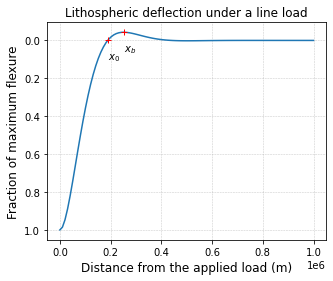

In [4]:
distance = np.linspace(0, 1000e3, 100)
alpha    = 80e3

fig, ax  = plt.subplots(figsize=(5, 4))

ax.plot(distance, w_over_w0(distance))
ax.set_xlabel('Distance from the applied load (m)', fontsize=12)
ax.set_ylabel('Fraction of maximum flexure', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title('Lithospheric deflection under a line load')

# plot the half-wavelength of the forebuldge
x0 = (3/4)*np.pi*alpha
xb = np.pi*alpha

ax.plot(x0, 0, 'r+')
ax.annotate('$x_0$', xy= (x0, 0.1) )

ax.plot(xb, w_over_w0(xb), 'r+')
ax.annotate('$x_b$', xy= (xb, 0.06) )

ax.invert_yaxis()

The red markers in the above plot denote the forebulge half-width, which can be used to determine the elastic lithosphere thickness (see above).

### Bending of lithosphere at ocean trench

We can model the bending of the oceanic lithosphere at the trench acted upon the end load $V_0$ and a bending momemt, $M_0$, to get the deflection profile given by:

\begin{equation}
    w = \frac{\alpha^2 e^{-x/\alpha}} {2 D} \left(-M_0 \sin \frac{x}{\alpha} + (V_0\alpha + M_0) \cos \frac{x}{\alpha} \right), \tag5
\end{equation}

where, $\alpha, D$ are the flexural rigidity and the flexural parameter of the plate, respectively, defined above.


The quantities, $M_0$ and $V_0$, are determined using the height, $w_b$, and the half-width, $x_b-x_0$, of the forebulge.  

Upon substituting the values of the forebulge height and half-width, we can rewrite the eq. (5) as:

\begin{equation}
    \frac{w}{w_b} = \sqrt{2} e^{\pi/4} \exp \left[-\frac{\pi}{4} \left(\frac{x - x_0}{x_b - x_0} \right) \right] \sin \left[\frac{\pi}{4} \left(\frac{x - x_0}{x_b - x_0} \right) \right] \tag6
\end{equation}


The observed half-width is the direct measure of the flexural parameter: $x_b-x_0 = (\pi/4) \alpha$. This can be used with eq. (6) to approximate the elastic lithosphere thickness by fitting the profile with the observations (see image below):

<div>
<img src='./images/mariana-trench-fit.png' width="600"/>
<figcaption align = "center"> Image: Observed bathymetric profile across the Mariana Trench (solid line) and the bending profile computed using eq. (6) with $wb = 0.5 km$ and $x_b - x_0 = 55 km$, from Turcotte and Schubert (2002).</figcaption>
</div>


### Plotting the bending profile of Mariana Trench

In [4]:
def w (x, x0 = 0, half_width = 55e3, wb = 0.5e3):
    '''
        Calculates the plate bending profile for an elastic lithosphere at an oceanic trench as the 
        oceanic plate is subducting.

        Input:
            x         : float or array-like
                        The distance along the plate from the location at which the line load is applied.
            x0        : float
                        The location along the plate where the moment is applied (or where it subducts).
            half_width: float 
                        The half-width of the forebulge in the bending profile.
            wb        : float
                        The maximum height of the forebulge.

        Returns:
            float or array
               The flexure of the plate relative to its original shape.
    '''
    return wb*np.sqrt(2)*np.exp(np.pi/4)*np.exp(-np.pi/4*((x - x0)/half_width))*np.sin(np.pi/4*((x - x0)/half_width))

(-5.0, 1.0)

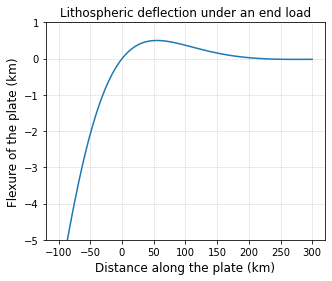

In [5]:
distance = np.linspace(-100e3, 300e3, 100)
fig, ax  = plt.subplots(figsize=(5, 4))

ax.plot(distance/1e3, w(distance)/1e3)
ax.set_xlabel('Distance along the plate (km)', fontsize=12)
ax.set_ylabel('Flexure of the plate (km)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title('Lithospheric deflection under an end load')
ax.set_ylim([-5, 1])

### Further reading
For more details and derivation of the equations, see *Geodynamics* by Turcotte and Schubert (2002).

  &nbsp;<div style="text-align: right">  
    &rarr; <b>NEXT: [Modeling plate bending](./3_modeling_plate_bending.ipynb) </b> <a href=""></a> &nbsp;&nbsp;
     <img src="../assets/education-gem-notebooks_icon.png" alt="icon"  style="width:4%">
  </div>